Importing Libraries

In [1]:
import cv2 #for image processing
import numpy as np #for numerical operations
import tensorflow as tf #for dl
import matplotlib.pyplot as plt #for plotting graphs
import warnings
warnings.simplefilter("ignore")

from tensorflow.keras.layers import Flatten, Dense #to produce layers
from sklearn.model_selection import train_test_split #for splitting the dataset
from emnist import extract_training_samples, extract_test_samples #loading the emnist dataset


Loading and splitting the data

In [2]:
# Load the EMNIST dataset
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(len(x_train))
print(len(x_test))

99840
24960


Normalizing the data

In [3]:
# Scale pixel values to [0, 1]
x_train = x_train / 255.0  
x_test = x_test / 255.0

# EMNIST labels start from 1, subtract 1 to make them start from 0
y_train = y_train - 1  
y_test = y_test - 1

Creating ANN layers

In [6]:
model=tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(150, activation="relu"))
model.add(Dense(80, activation="relu"))
model.add(Dense(26, activation="softmax"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])

Fitting and saving the model

In [7]:
model.fit(x_train,y_train,epochs=10)
model.save('alphabets.model')

Epoch 1/10
3120/3120 [==============================] - 10s 3ms/step - loss: 0.7135 - accuracy: 0.7864
Epoch 2/10
3120/3120 [==============================] - 5s 2ms/step - loss: 0.3977 - accuracy: 0.8738
Epoch 3/10
3120/3120 [==============================] - 5s 2ms/step - loss: 0.3266 - accuracy: 0.8944
Epoch 4/10
3120/3120 [==============================] - 5s 1ms/step - loss: 0.2866 - accuracy: 0.9054
Epoch 5/10
3120/3120 [==============================] - 4s 1ms/step - loss: 0.2601 - accuracy: 0.9128
Epoch 6/10
3120/3120 [==============================] - 4s 1ms/step - loss: 0.2368 - accuracy: 0.9200
Epoch 7/10
3120/3120 [==============================] - 4s 1ms/step - loss: 0.2202 - accuracy: 0.9247
Epoch 8/10
3120/3120 [==============================] - 4s 1ms/step - loss: 0.2062 - accuracy: 0.9288
Epoch 9/10
3120/3120 [==============================] - 4s 1ms/step - loss: 0.1943 - accuracy: 0.9320
Epoch 10/10
3120/3120 [==============================] - 4s 1ms/step - loss: 0.18

INFO:tensorflow:Assets written to: alphabets.model\assets


Evaluating the model

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

780/780 [==============================] - 1s 904us/step - loss: 0.3651 - accuracy: 0.8952
Test Loss: 0.3651, Test Accuracy: 0.8952


Classifying inputs

1/1 [==============================] - 0s 33ms/step
				  The letter is probably:
						' B '


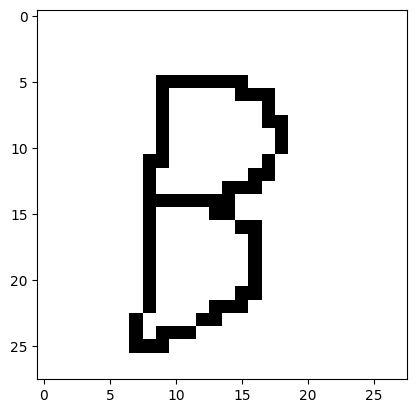

In [11]:
#load and use the model
model=tf.keras.models.load_model('alphabets.model')

#loading the image
img=cv2.imread(f"alphabets/alphab.png")[:,:,0]

#inverting the image
img=np.invert(np.array([img]))

#make prediction
prediction=model.predict(img)
predicted_label = np.argmax(prediction)
recognized_character = chr(predicted_label + ord('A'))  # Alphabets

print("\t\t\t\t  The letter is probably:\n\t\t\t\t\t\t'", recognized_character, "'")
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()